In [24]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
#read in raw data
sales_data = pd.read_excel("../Resources/2019 Winter Data Science Intern Challenge Data Set.xlsx")
sales_data                           

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190022
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999116
2,3,44,861,144,1,cash,2017-03-14 04:23:55.594730
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.648760
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.772536
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.596993
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389130
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228042
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.187847


In [6]:
#checks for null values, none were foun
sales_data.isnull()
sales_data.dropna()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190022
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999116
2,3,44,861,144,1,cash,2017-03-14 04:23:55.594730
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.648760
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.772536
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.596993
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389130
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228042
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.187847


In [7]:
#summary statistics 
sales_data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

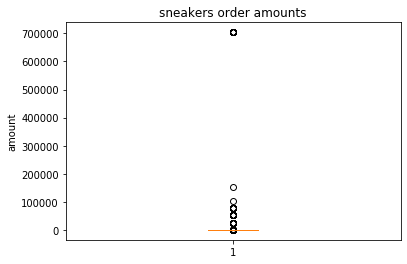

In [49]:
orders = sales_data["order_amount"]
fig1, ax1 = plt.subplots()
ax1.set_title('sneakers order amounts')
ax1.set_ylabel('amount')
ax1.boxplot(orders)
plt.show()

In [56]:
sales_data.sort_values(["order_amount"],ascending=False).head(15)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00


In [58]:
quartiles = orders.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of order amount is: {lowerq}")
print(f"The upper quartile of oder amount is: {upperq}")
print(f"The interquartile range of order amount is: {iqr}")
print(f"The the median of order amount is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of order amount is: 163.0
The upper quartile of oder amount is: 390.0
The interquartile range of order amount is: 227.0
The the median of order amount is: 284.0 
Values below -177.5 could be outliers.
Values above 730.5 could be outliers.
